# Observando filtro de canny e rotações

## Importando bibliotecas

In [1]:
import numpy as np
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.feature import canny
from skimage.filters import threshold_otsu
from skimage.transform import rotate

from img_edit import _find_tilt_angle, fill_empty_edges

sns.set_style(style='darkgrid')
plt.gray()

LIMITE_DE_NORMALIZACAO = 8

COLOR_NAMES = ['vermelho', 'verde', 'azul']
COLOR_CODES = ['r-', 'g-', 'b-', 'brown-', 'orange-']

/home/anilton/anaconda3/envs/ml_venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/anilton/anaconda3/envs/ml_venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<Figure size 432x288 with 0 Axes>

In [2]:
path_list = []
with ZipFile('./toras.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./toras.zip/{path}')

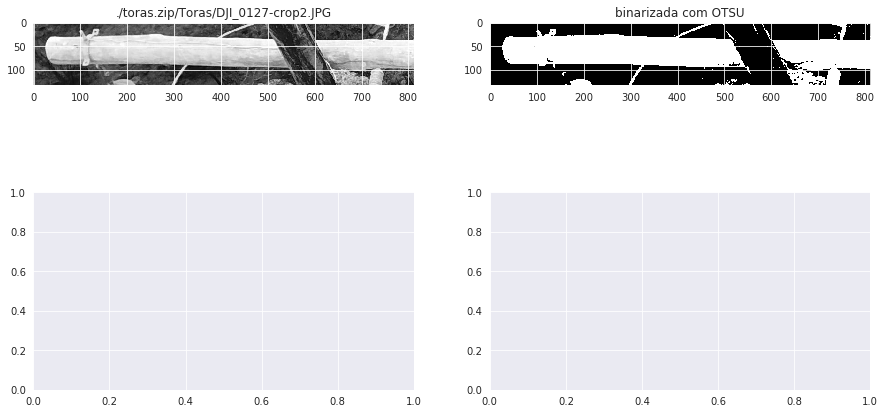

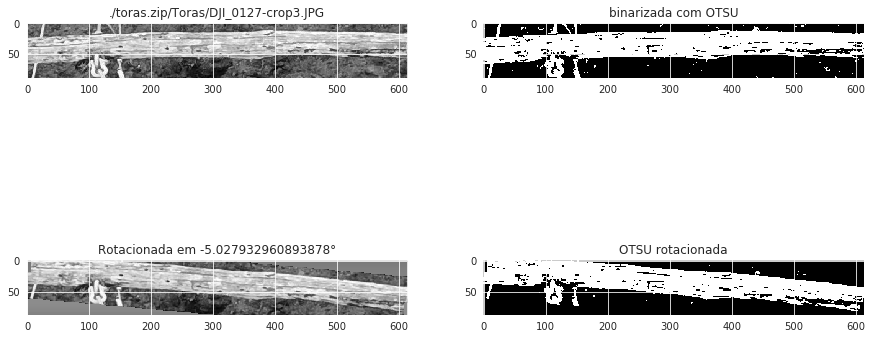

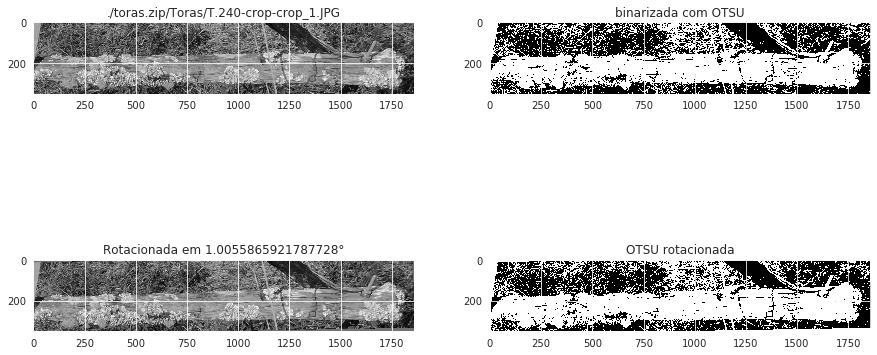

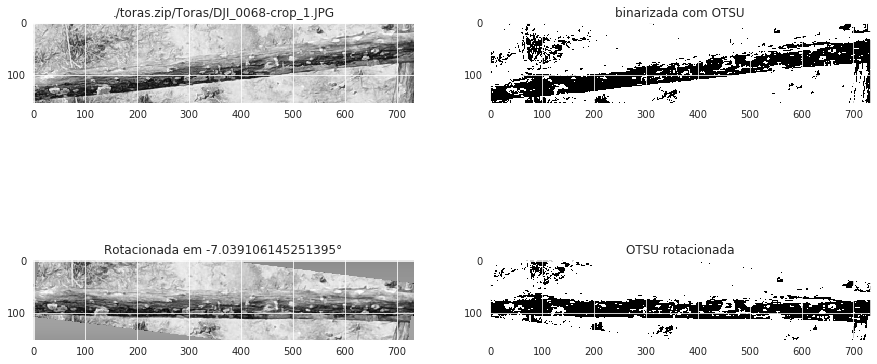

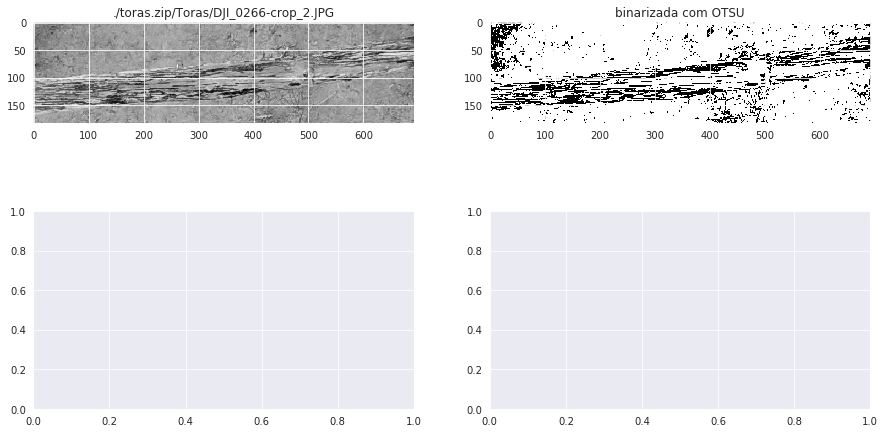

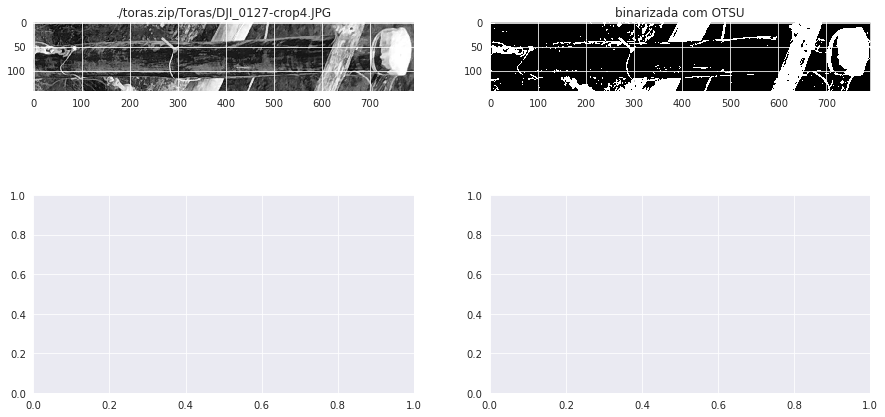

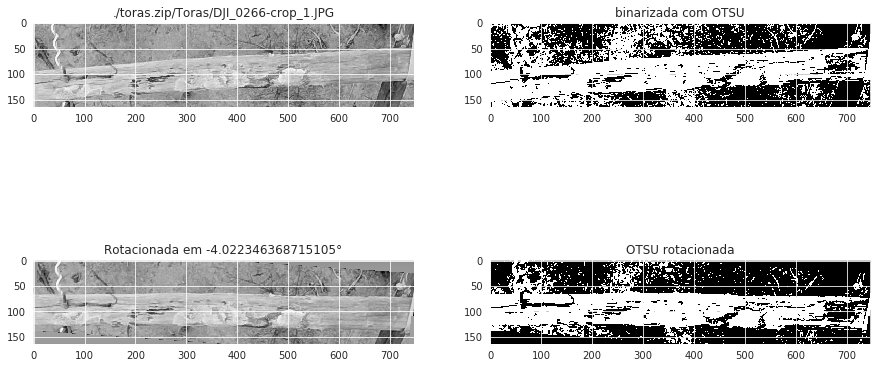

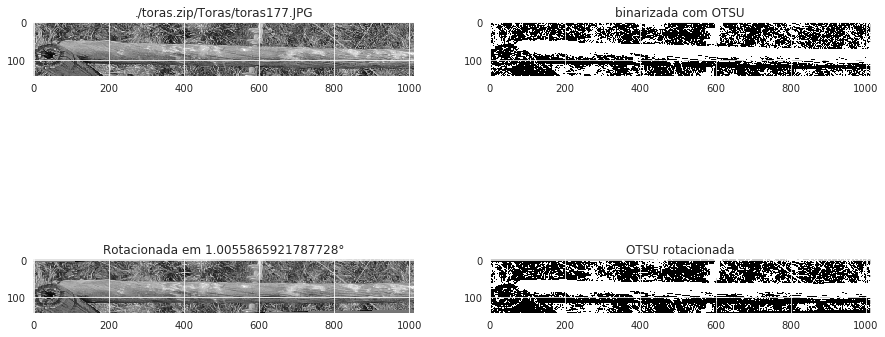

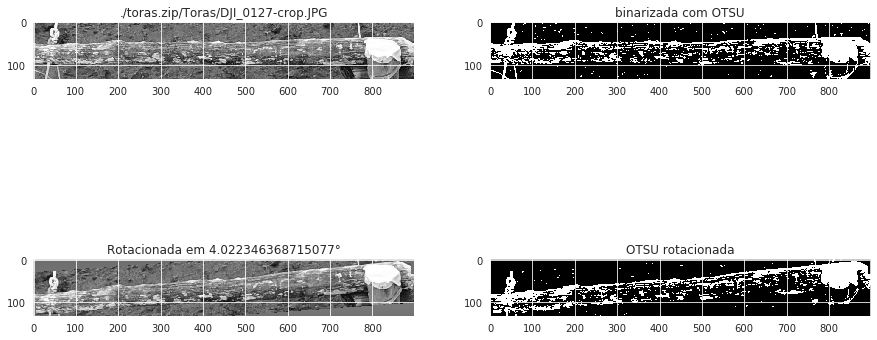

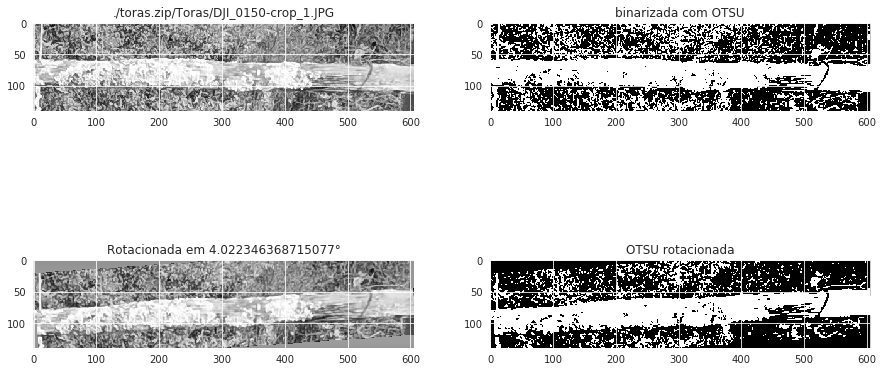

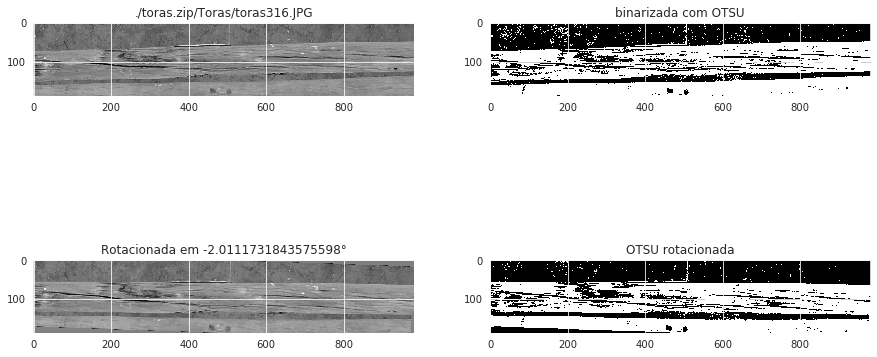

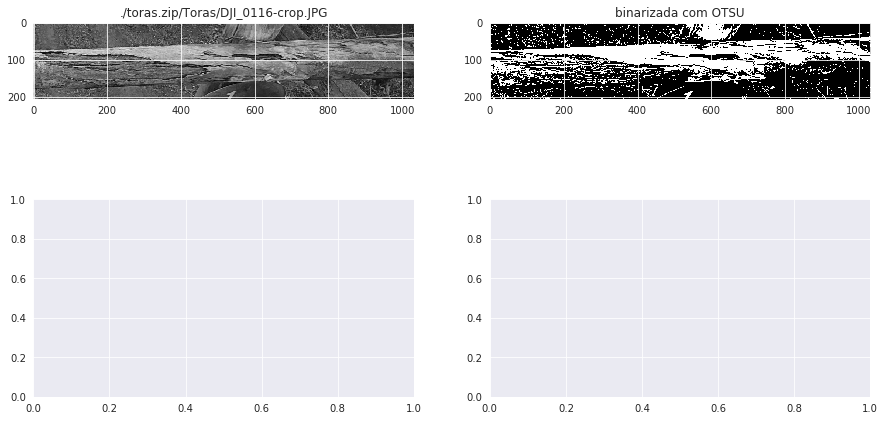

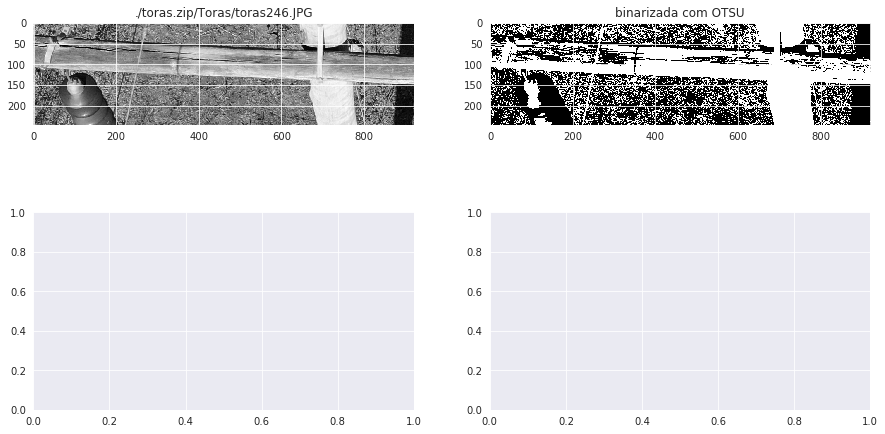

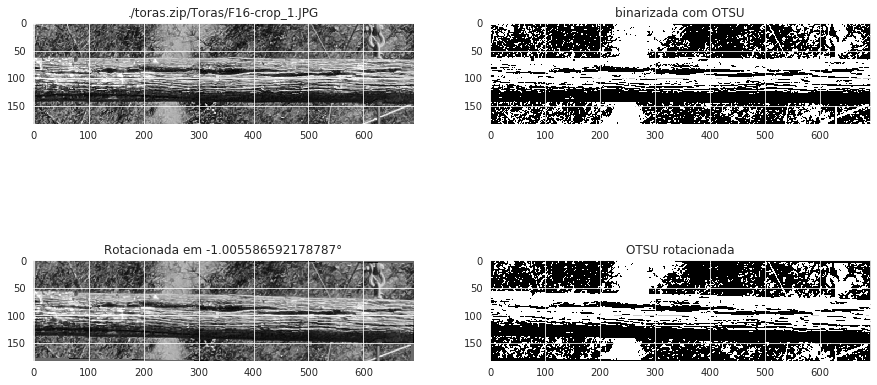

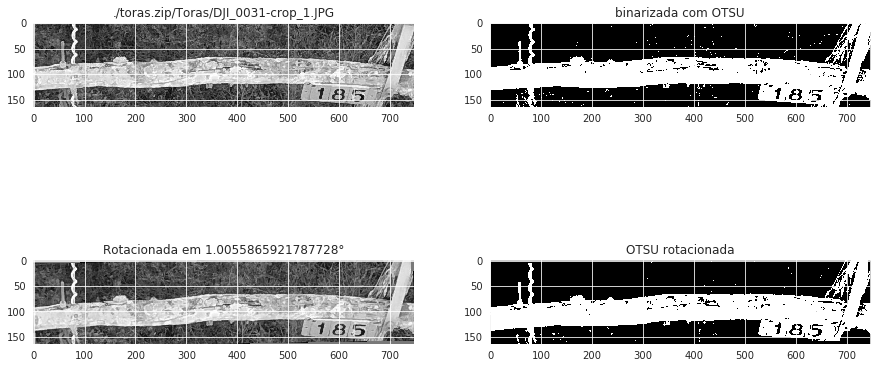

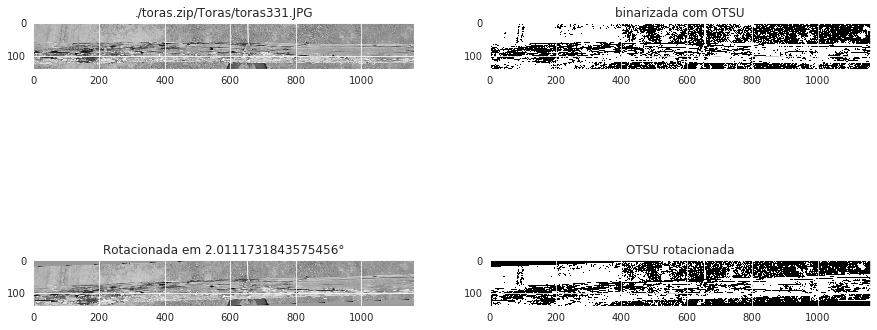

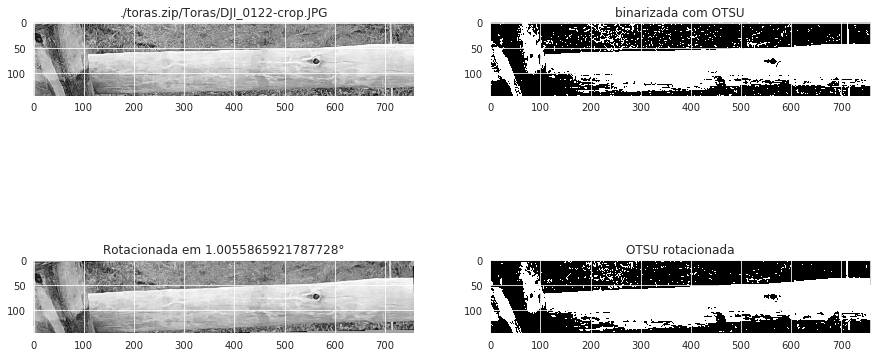

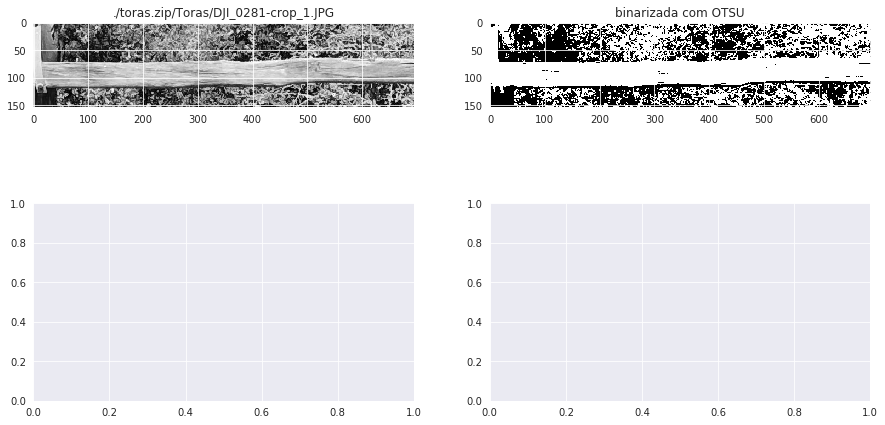

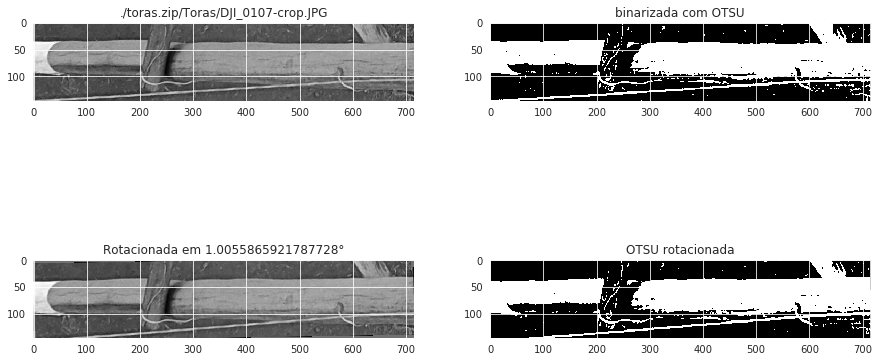

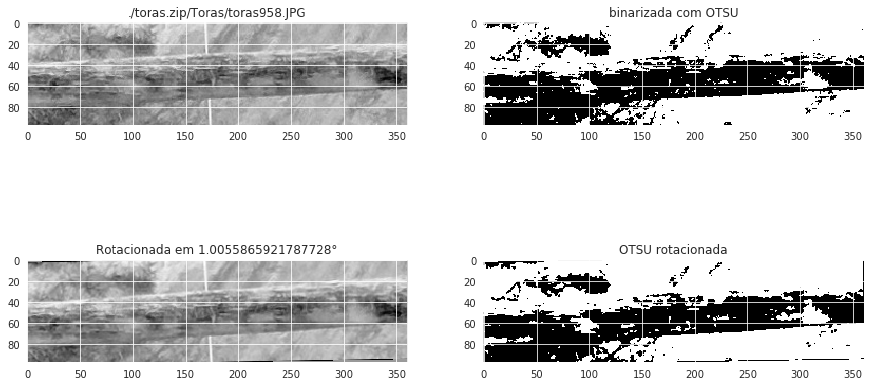

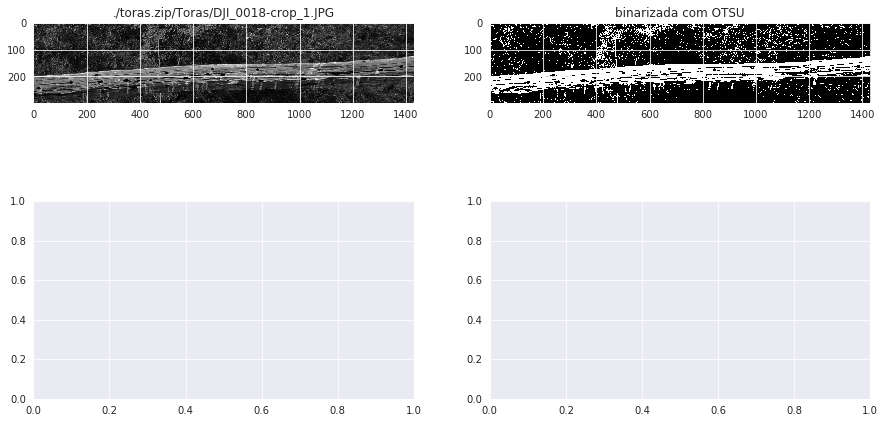

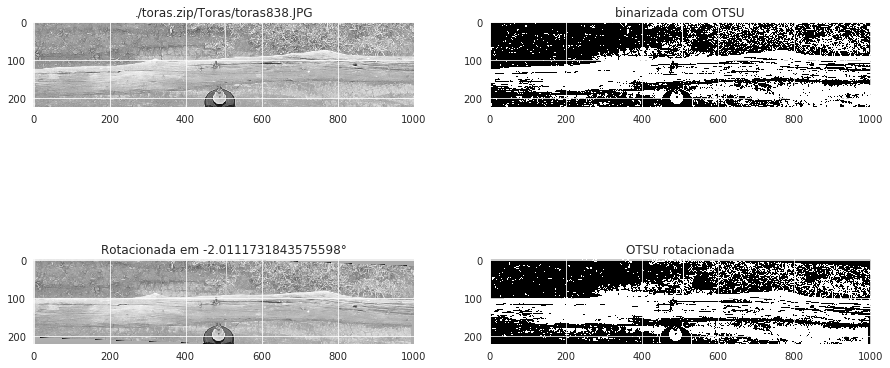

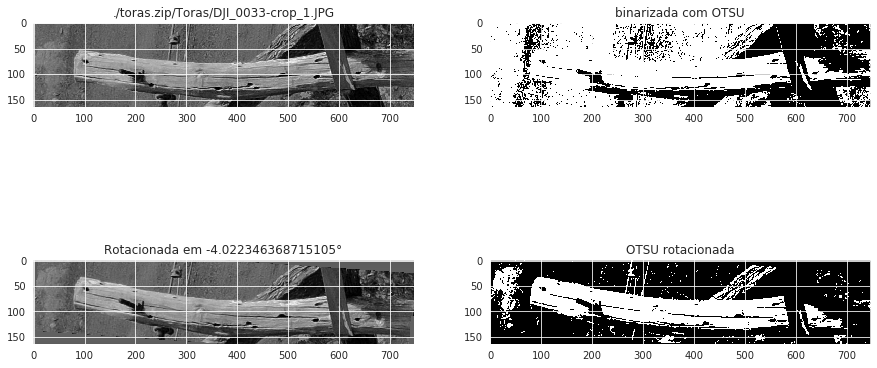

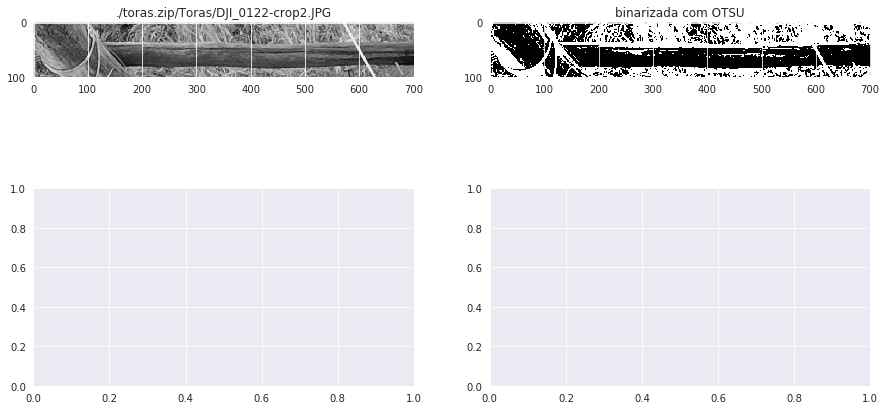

In [4]:
for path in path_list:
  # lendo imagem grayscale
  img_gray = imread(path, as_gray=True)

  # encontrando bordas
  img_otsu = img_gray >= threshold_otsu(img_gray)
  edges = canny(img_otsu)

  # Rotacionando imagem se for preciso
  angle = _find_tilt_angle(edges)

  # Plotando imagens
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

  # Plotando imagem original
  ax[0, 0].title.set_text(f'{path}')
  ax[0, 0].imshow(img_gray)

  # Exibindo imagem binarizada
  ax[0, 1].title.set_text(f'binarizada com OTSU')
  ax[0, 1].imshow(img_otsu)

  if angle != 0:
    # Versão rotacionada
    rot_img = rotate(img_gray, angle)
    filled_img = fill_empty_edges(rot_img)
    ax[1, 0].title.set_text(f'Rotacionada em {angle}°')
    ax[1, 0].imshow(filled_img)

    # OTSU rotacionado
    ax[1, 1].title.set_text(f'OTSU rotacionada')
    ax[1, 1].imshow(filled_img >= threshold_otsu(filled_img))

  plt.show()
